<a href="https://colab.research.google.com/github/kriskirla/AllProjects/blob/master/Algotrading/Stock_Forecast_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program will predict the stock for a specific day using ML

In [ ]:
!pip install yfinance

In [ ]:
# Import libaries
from sklearn.svm import SVR
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
ticker = "ARKK";

# Get data from yahoo finance
df = yf.download(ticker, start="2021-01-01", end=dt.today().strftime('%Y-%m-%d'))
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,126.220001,127.190002,122.440002,124.690002,124.690002,8314400
2021-01-05,124.379997,127.839996,124.080002,127.760002,127.760002,5362200
2021-01-06,126.690002,131.149994,125.849998,128.229996,128.229996,6847500
2021-01-07,131.160004,138.619995,131.130005,138.380005,138.380005,8145100
2021-01-08,142.029999,145.639999,139.289993,142.479996,142.479996,12830300
2021-01-11,140.250000,140.630005,136.800003,138.220001,138.220001,8217800
2021-01-12,140.179993,141.660004,139.039993,140.990005,140.990005,6045300
2021-01-13,141.929993,143.500000,140.500000,141.720001,141.720001,5182100
2021-01-14,143.362000,147.449997,142.779999,145.279999,145.279999,7691100


In [ ]:
# ===== ONLY RUN THIS TO TEST RESULT =====
# Get the last row of data to test the correctness
actual_price = df.tail(1)
actual_price
# Get the data except for the last row
df = df.head(len(df) - 1)
df

In [ ]:
# Create independant dataset and dependant dataset
df_days = df.index
df_adj_close = df.loc[:, 'Adj Close']

days = [[i.dayofyear] for i in df_days ]
adj_close_price = [float(price) for price in df_adj_close]

In [ ]:
# Linear Model
lin_svr = SVR(kernel='linear', C=1000)
lin_svr.fit(days, adj_close_price)
# Polynomial Model
poly_svr = SVR(kernel='poly', C=1000, degree=2)
poly_svr.fit(days, adj_close_price)
# Radial Basis Function Model
rbf_svr = SVR(kernel='rbf', C=1000, gamma=0.85)
rbf_svr.fit(days, adj_close_price)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

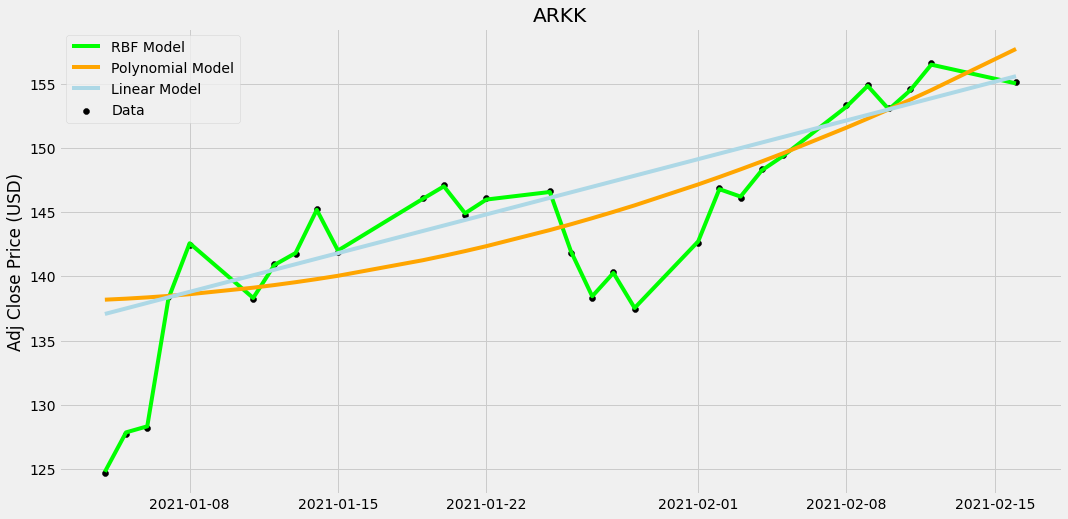

In [ ]:
# Plot the models
plt.figure(figsize=(16,8))
plt.scatter(df.index, adj_close_price, color='black', label='Data')
plt.plot(df.index, rbf_svr.predict(days), color='lime', label='RBF Model')
plt.plot(df.index, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(df.index, lin_svr.predict(days), color='lightblue', label='Linear Model')
plt.title(ticker)
plt.ylabel('Adj Close Price (USD)')
plt.legend()
plt.show()

2021-02-17
Predicted price using RBF Model: [148.7873772]
Predicted price using Polynomial Model: [158.54786791]
Predicted price using Linear Model: [156.01269907]
2021-02-18
Predicted price using RBF Model: [144.49823392]
Predicted price using Polynomial Model: [159.41108911]
Predicted price using Linear Model: [156.44308378]
2021-02-19
Predicted price using RBF Model: [144.14014763]
Predicted price using Polynomial Model: [160.29210869]
Predicted price using Linear Model: [156.87346849]


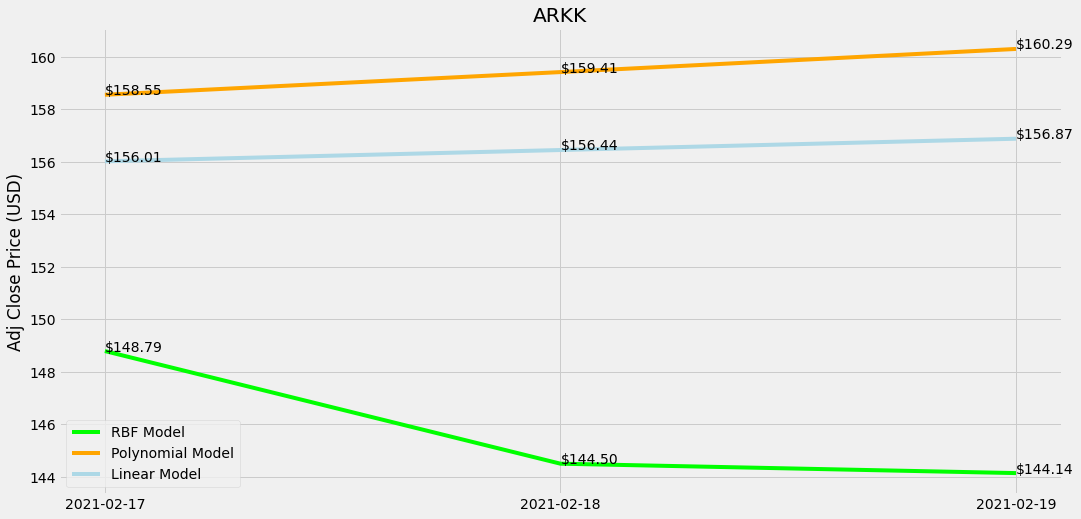

In [ ]:
# Test the predicted price for the next n days
n = 3
predict_days = list()
predict_rbf = list()
predict_poly = list()
predict_lin = list()

for i in range(1, n + 1):
  day = [[days[-1][0] + i]]
  date = dt.strptime('{} {}'.format(days[-1][0] + i, df_days.year[0]),'%j %Y').strftime('%Y-%m-%d')
  predict_days.append(date)
  predict_rbf.append(rbf_svr.predict(day))
  predict_poly.append(poly_svr.predict(day))
  predict_lin.append(lin_svr.predict(day))
  print(date)
  print(f"Predicted price using RBF Model: {rbf_svr.predict(day)}")
  print(f"Predicted price using Polynomial Model: {poly_svr.predict(day)}")
  print(f"Predicted price using Linear Model: {lin_svr.predict(day)}")
#print(f"Actual Price: {actual_price.iloc[0]['Adj Close']}")

# Plot the prediction graph
plt.figure(figsize=(16,8))
plt.plot(predict_days, predict_rbf, color='lime', label='RBF Model')
plt.plot(predict_days, predict_poly, color='orange', label='Polynomial Model')
plt.plot(predict_days, predict_lin, color='lightblue', label='Linear Model')
for i in range(len(predict_days)):
  plt.text(predict_days[i], predict_rbf[i], "${:.2f}".format(predict_rbf[i][0]))
  plt.text(predict_days[i], predict_poly[i], "${:.2f}".format(predict_poly[i][0]))
  plt.text(predict_days[i], predict_lin[i], "${:.2f}".format(predict_lin[i][0]))
plt.title(ticker)
plt.ylabel('Adj Close Price (USD)')
plt.legend()
plt.show()